# 將xml檔轉換成Yolo訓練的標記格式

In [1]:
import xml.etree.ElementTree as ET
import cv2
import matplotlib.pyplot as plt

filename:  rolled-in_scale_10.jpg
size of width 200
size of height 200 
=====bnbbox 0======
xmin 59
ymin 39
xmax 122
ymax 71
x 0.4525
y 0.275
w 0.315
h 0.16
=====bnbbox 1======
xmin 54
ymin 83
xmax 144
ymax 139
x 0.495
y 0.555
w 0.45
h 0.28


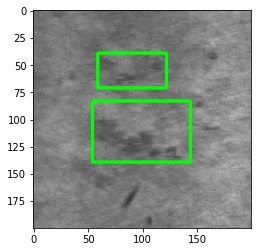

In [2]:
path = './NEU-DET/train/images/rolled-in_scale/rolled-in_scale_10.jpg'
img = cv2.imread(path)
# 解析xml檔
tree = ET.parse('./NEU-DET/train/annotations/'+path.split('/')[5][:-3]+'xml')
root = tree.getroot()
count = 0
for child in root:
    if child.tag == 'filename':
        print('filename: ', child.text)
    if child.tag == 'size':
        width = child[0].text
        height = child[1].text
        print('size of width %s' %width)
        print('size of height %s ' %height)
    if child.tag == 'object':
        print('=====bnbbox {}======'.format(count))
        bndbox = child.find('bndbox')
        xmin = int(bndbox[0].text)
        ymin = int(bndbox[1].text)
        xmax = int(bndbox[2].text)
        ymax = int(bndbox[3].text)
        print('xmin %s' %xmin)
        print('ymin %s' %ymin)
        print('xmax %s' %xmax)
        print('ymax %s' %ymax)
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
        x = (xmax+xmin)/2/200
        y = (ymax+ymin)/2/200
        w = (xmax-xmin)/200
        h = (ymax-ymin)/200
        print('x %s' %x)
        print('y %s' %y)
        print('w %s' %w)
        print('h %s' %h)
        count+=1
plt.imshow(img)

## 將全部的training set的 xml檔轉換成yolo txt檔並儲存跟影像同資料夾下

In [3]:
import os
for dirroot, dirs, files in os.walk('./NEU-DET/train/images/'):
    for filename in files:
        if filename.endswith('jpg'):
            if not os.path.isfile('./NEU-DET/train/annotations/'+ filename[:-3]+'xml'):
                continue
            tree = ET.parse('./NEU-DET/train/annotations/'+ filename[:-3]+'xml')
            outpath = os.path.join(dirroot,filename[:-3]+'txt')
            f = open(outpath, 'w')
            root = tree.getroot()
            for child in root:
                if child.tag == 'filename':
                    print('filename: ', child.text)
                if child.tag == 'size':
                    width = child[0].text
                    height = child[1].text
                if child.tag == 'object':
                    bndbox = child.find('bndbox')
                    xmin = int(bndbox[0].text)
                    ymin = int(bndbox[1].text)
                    xmax = int(bndbox[2].text)
                    ymax = int(bndbox[3].text)

                    x = (xmax+xmin)/2/200
                    y = (ymax+ymin)/2/200
                    w = (xmax-xmin)/200
                    h = (ymax-ymin)/200

                    f.write('{} {} {} {} {}\n'.format(0, x,y,w,h))
            f.close()

filename:  scratches_238.jpg
filename:  scratches_218.jpg
filename:  scratches_124.jpg
filename:  scratches_160.jpg
filename:  scratches_69.jpg
filename:  scratches_174.jpg
filename:  scratches_121.jpg
filename:  scratches_7.jpg
filename:  scratches_57.jpg
filename:  scratches_98.jpg
filename:  scratches_230.jpg
filename:  scratches_27.jpg
filename:  scratches_136.jpg
filename:  scratches_40.jpg
filename:  scratches_186.jpg
filename:  scratches_133.jpg
filename:  scratches_49.jpg
filename:  scratches_38.jpg
filename:  scratches_75.jpg
filename:  scratches_161.jpg
filename:  scratches_130.jpg
filename:  scratches_145.jpg
filename:  scratches_76.jpg
filename:  scratches_12.jpg
filename:  scratches_61.jpg
filename:  scratches_11.jpg
filename:  scratches_17.jpg
filename:  scratches_1.jpg
filename:  scratches_235.jpg
filename:  scratches_39.jpg
filename:  scratches_163.jpg
filename:  scratches_48.jpg
filename:  scratches_132.jpg
filename:  scratches_109.jpg
filename:  scratches_14.jpg
filen

## 將全部的validation set的 xml檔轉換成yolo txt檔並儲存跟影像同資料夾下

In [4]:
import os
for dirroot, dirs, files in os.walk('./NEU-DET/validation/images/'):
    for filename in files:
        if filename.endswith('jpg'):
            if not os.path.isfile('./NEU-DET/validation/annotations/'+ filename[:-3]+'xml'):
                continue
            tree = ET.parse('./NEU-DET/validation/annotations/'+ filename[:-3]+'xml')
            outpath = os.path.join(dirroot,filename[:-3]+'txt')
            f = open(outpath, 'w')
            root = tree.getroot()
            for child in root:
                if child.tag == 'filename':
                    print('filename: ', child.text)
                if child.tag == 'size':
                    width = child[0].text
                    height = child[1].text
                if child.tag == 'object':
                    bndbox = child.find('bndbox')
                    xmin = int(bndbox[0].text)
                    ymin = int(bndbox[1].text)
                    xmax = int(bndbox[2].text)
                    ymax = int(bndbox[3].text)

                    x = (xmax+xmin)/2/200
                    y = (ymax+ymin)/2/200
                    w = (xmax-xmin)/200
                    h = (ymax-ymin)/200

                    f.write('{} {} {} {} {}\n'.format(0, x,y,w,h))
            f.close()

filename:  scratches_249.jpg
filename:  scratches_275.jpg
filename:  scratches_281.jpg
filename:  scratches_258.jpg
filename:  scratches_248.jpg
filename:  scratches_293.jpg
filename:  scratches_250.jpg
filename:  scratches_291.jpg
filename:  scratches_243.jpg
filename:  scratches_260.jpg
filename:  scratches_265.jpg
filename:  scratches_278.jpg
filename:  scratches_300.jpg
filename:  scratches_280.jpg
filename:  scratches_285.jpg
filename:  scratches_268.jpg
filename:  scratches_272.jpg
filename:  scratches_244.jpg
filename:  scratches_252.jpg
filename:  scratches_257.jpg
filename:  scratches_261.jpg
filename:  scratches_296.jpg
filename:  scratches_270.jpg
filename:  scratches_282.jpg
filename:  scratches_273.jpg
filename:  scratches_247.jpg
filename:  scratches_255.jpg
filename:  scratches_288.jpg
filename:  scratches_297.jpg
filename:  scratches_246.jpg
filename:  scratches_259.jpg
filename:  scratches_253.jpg
filename:  scratches_269.jpg
filename:  scratches_294.jpg
filename:  scr